In [6]:
import pandas as pd
import numpy as np
import os
import string
import math
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm
from scipy import stats
sns.distributions._has_statsmodels=False
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.neural_network import *
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt 
from subprocess import check_output
from pywget import wget

import warnings; warnings.simplefilter('ignore')

os.chdir('/Users/pawanshivhare/Desktop/fbprep/inter')

print(check_output(["ls","../inter"]).decode('utf8'))

rotten_tomatoes_movies.csv



In [5]:
link = "http://www.test.com/test.tar.gz"
wget.download(link)

'./test.tar.gz'

In [10]:
data=pd.read_csv('rotten_tomatoes_movies.csv')

num_cols=data._get_numeric_data().columns.tolist()
cat_cols=list(set(data.columns)-set(num_cols))

print(data.shape)
print(num_cols)
print(cat_cols)

redun_num_cols=['']
redun_cat_cols=['']

data.describe().T

(8701, 23)
['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'audience_top_critics_count', 'audience_fresh_critics_count', 'audience_rotten_critics_count']
['genre', 'movie_info', 'in_theaters_date', 'cast', 'directors', 'writers', 'rotten_tomatoes_link', 'studio_name', 'audience_status', 'poster_image_url', 'tomatometer_status', 'critics_consensus', 'on_streaming_date', 'movie_title', 'rating']


,count,mean,std,min,25%,50%,75%,max
runtime_in_minutes,8628.0,102.408669,2.841686e+01,1.0,90.0,99.0,111.00,2000.0
tomatometer_rating,8701.0,60.516837,2.849683e+01,0.0,38.0,66.0,86.00,100.0
tomatometer_count,8701.0,56.949776,6.692731e+01,5.0,12.0,28.0,77.00,497.0
audience_rating,8574.0,60.680079,2.038486e+01,0.0,45.0,63.0,78.00,100.0
audience_count,8574.0,143017.683695,1.734948e+06,5.0,885.5,4945.5,29594.75,35797635.0
audience_top_critics_count,8701.0,14.666820,1.484040e+01,0.0,3.0,8.0,24.00,64.0
audience_fresh_critics_count,8701.0,35.905873,5.116368e+01,0.0,6.0,16.0,43.00,470.0
audience_rotten_critics_count,8701.0,21.037122,3.029648e+01,0.0,3.0,8.0,24.00,271.0


In [13]:
data['label']=np.where(data['tomatometer_status']=='Rotten',1,0)

In [14]:
data['label'].value_counts()/data.shape[0]

0    0.565682
1    0.434318
Name: label, dtype: float64

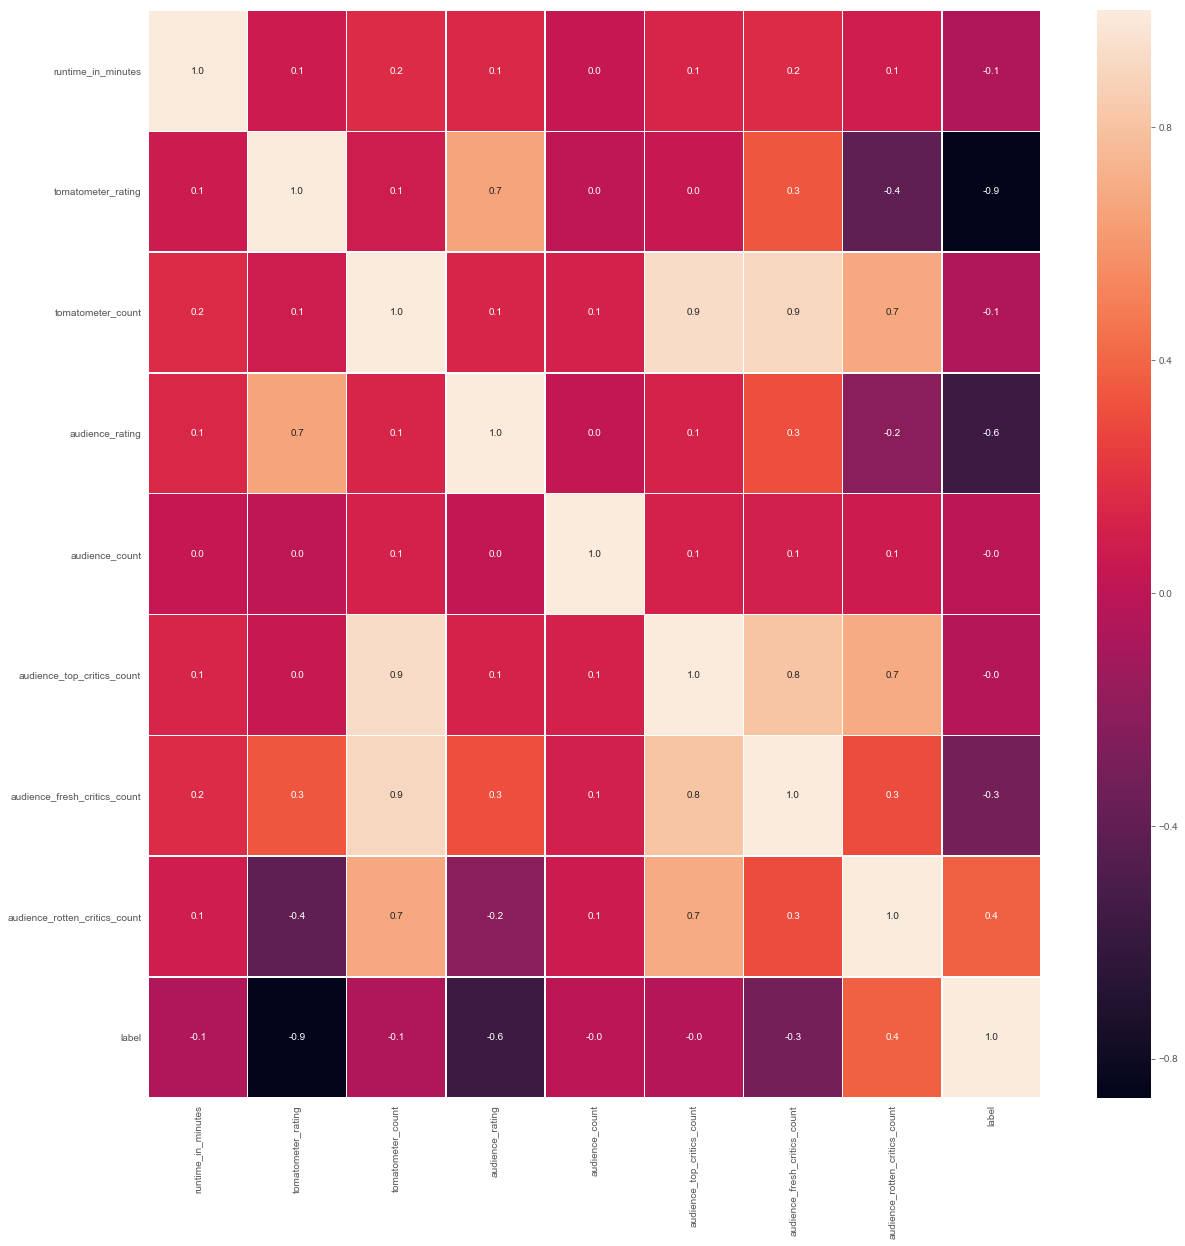

In [16]:
corrset=num_cols+['label']
fig, axes=plt.subplots(figsize=(20,20))
sns.heatmap(data[corrset].corr(),annot=True,fmt='.1f',linewidth=0.5,ax=axes)

In [27]:
th=0.2
impvars=list(data[corrset].corr()['label'].loc[((data[corrset].corr()['label'] > th) |(data[corrset].corr()['label'] <-th))].index)
print(impvars)

['tomatometer_rating', 'audience_rating', 'audience_fresh_critics_count', 'audience_rotten_critics_count', 'label']


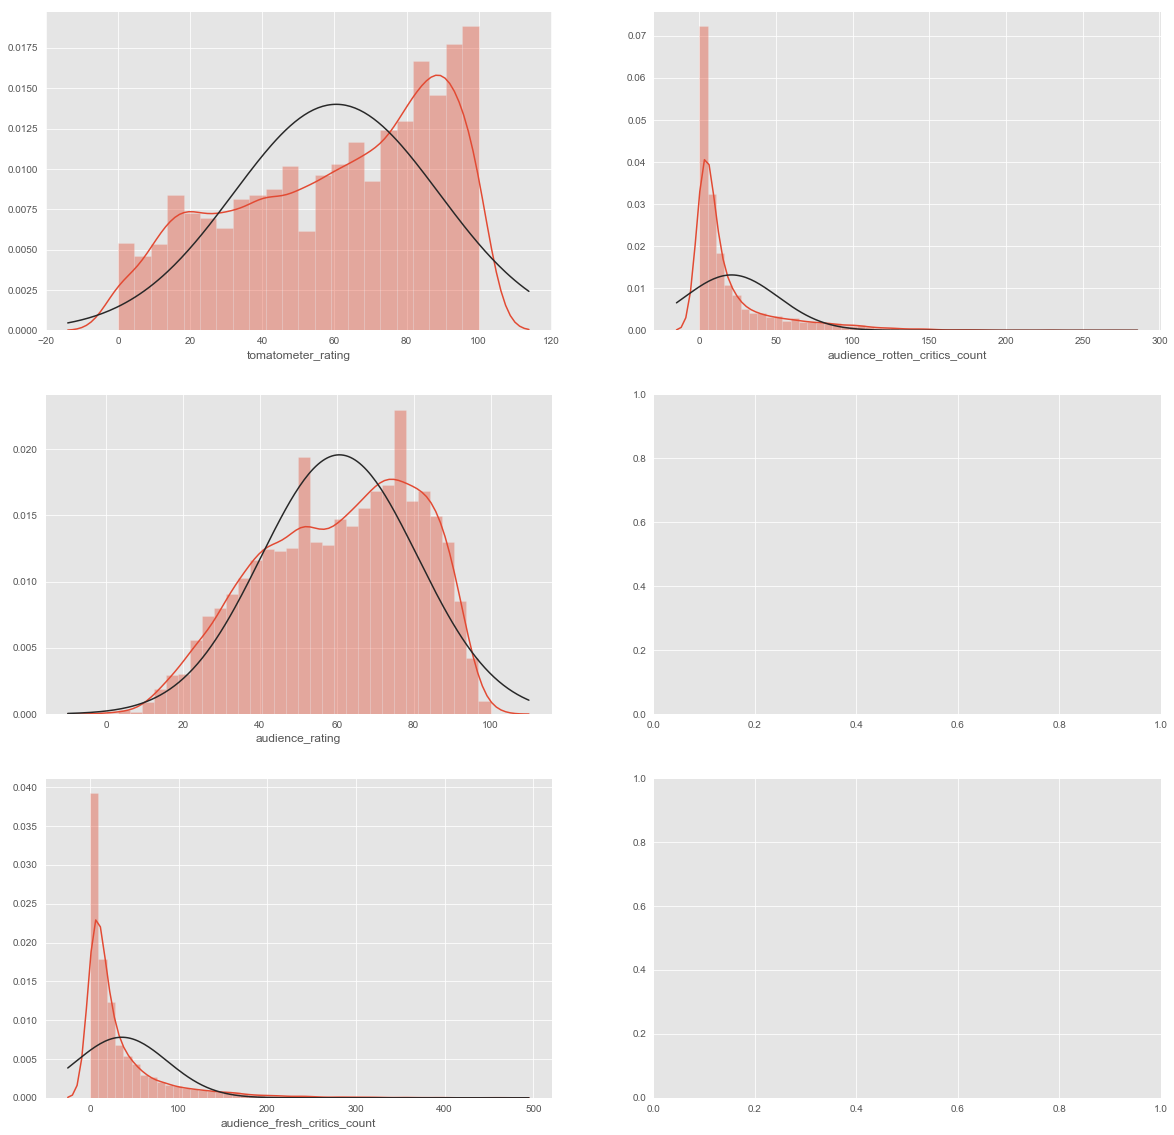

In [30]:
fig, axes = plt.subplots(figsize=(20,20), nrows=round(len(impvars)/2)+1,ncols=2)
i=0
j=0
for item in impvars:
    if item == 'label':
        continue
    sns.distplot(data[item].dropna(),fit=norm,ax=axes[i,j])
    if i==round(len(impvars)/2):
        i=0
        j=1
    else:
        i=i+1

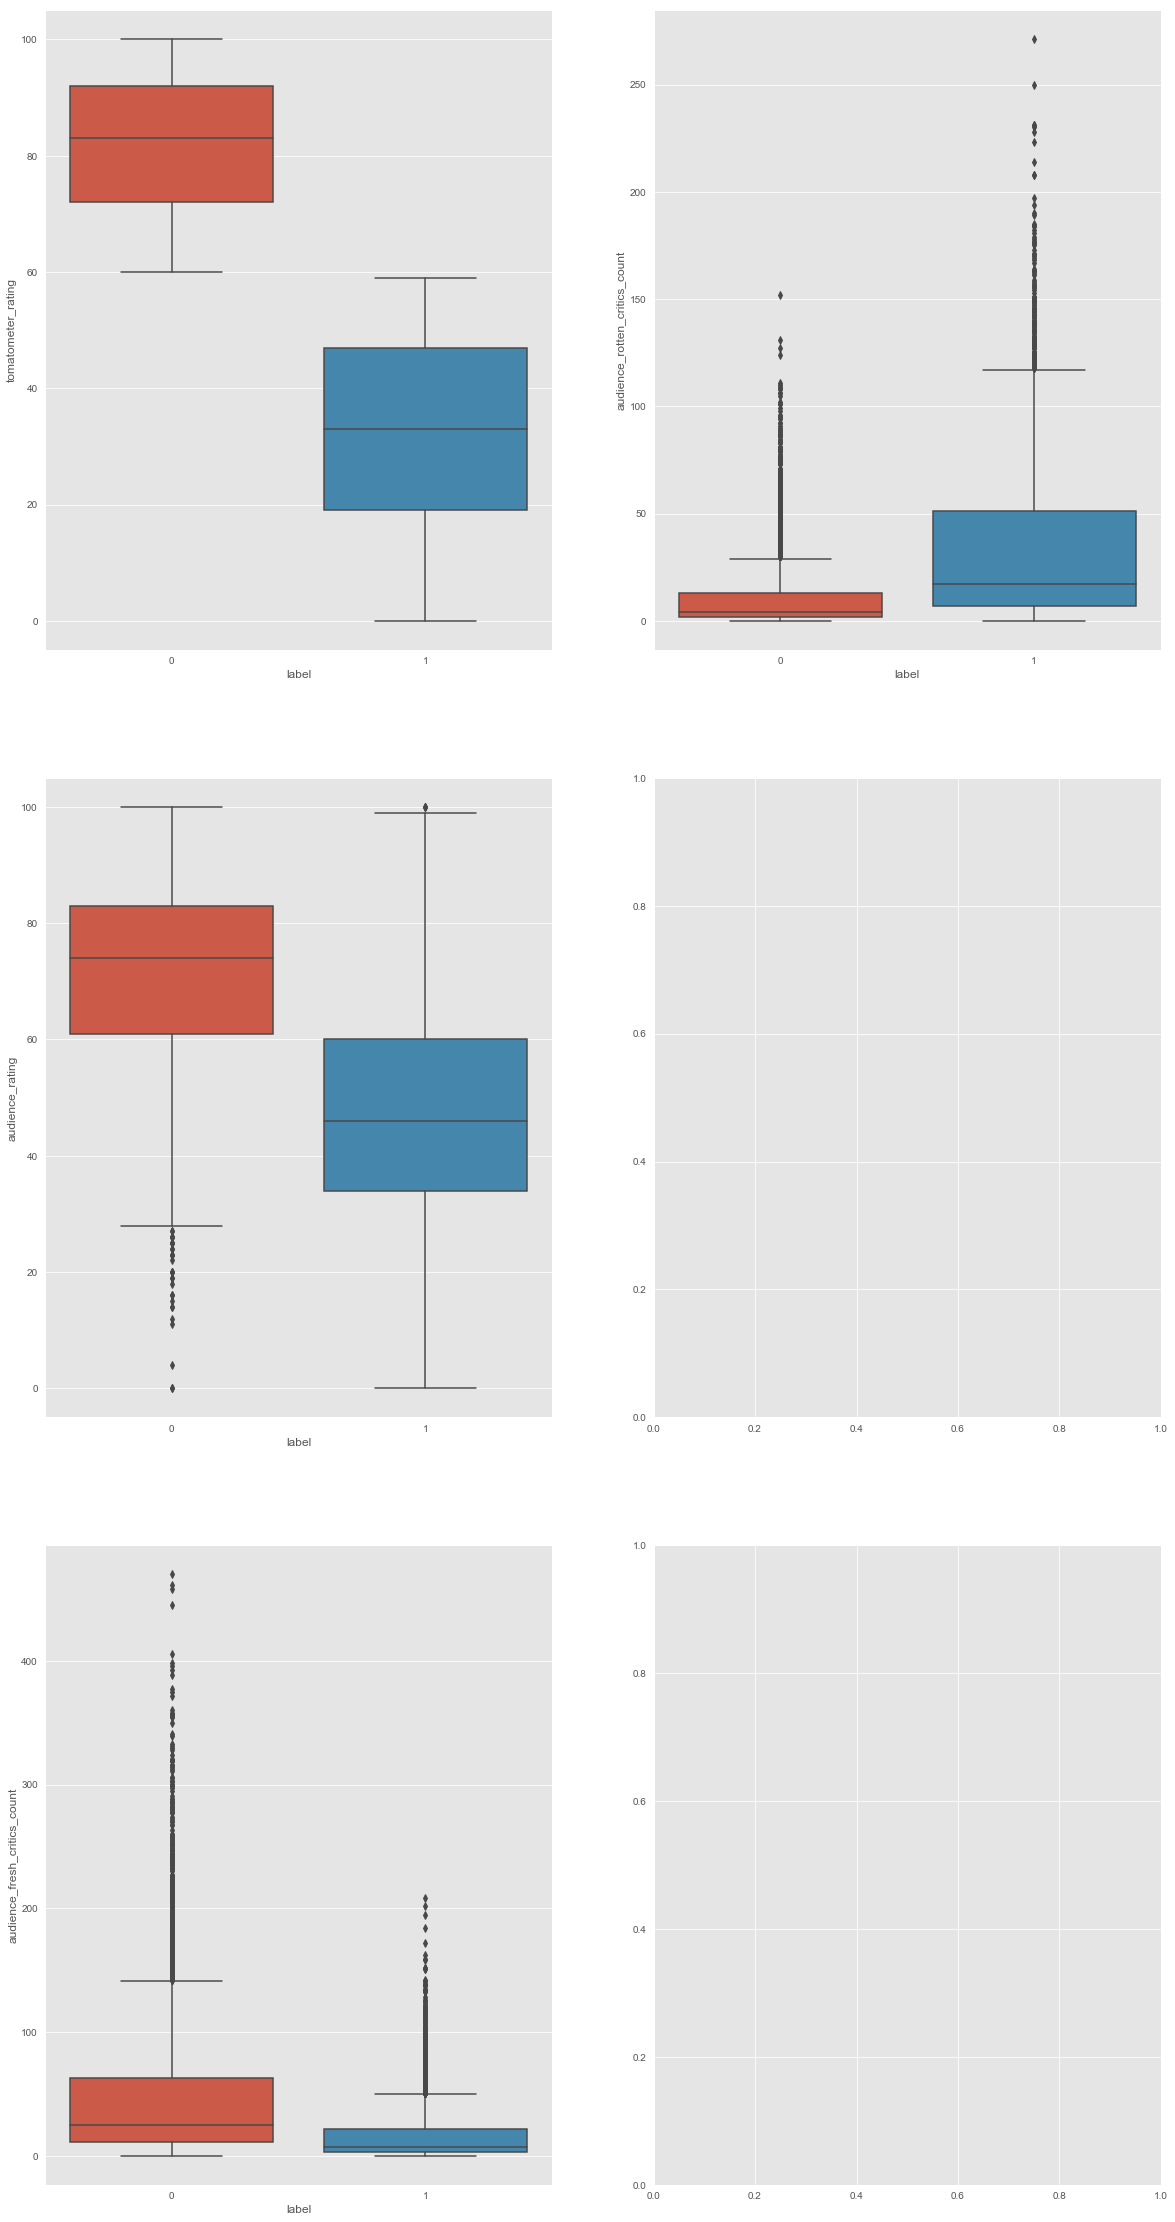

In [33]:
fig, axes = plt.subplots(figsize=(20,40), nrows=round(len(impvars)/2)+1,ncols=2)
i=0
j=0
for item in impvars:
    if item == 'label':
        continue
    sns.boxplot(x=data['label'],y=data[item],ax=axes[i,j])
    if i==round(len(impvars)/2):
        i=0
        j=1
    else:
        i=i+1

In [42]:
redun_cat_cols=['movie_info','in_theaters_date','cast','directors','writers','rotten_tomatoes_link',
                'poster_image_url','critics_consensus','on_streaming_date','movie_title','tomatometer_status','studio_name',
               'genre']

n_cat_cols=list(set(cat_cols)-set(redun_cat_cols))
print(n_cat_cols)

['rating', 'audience_status']


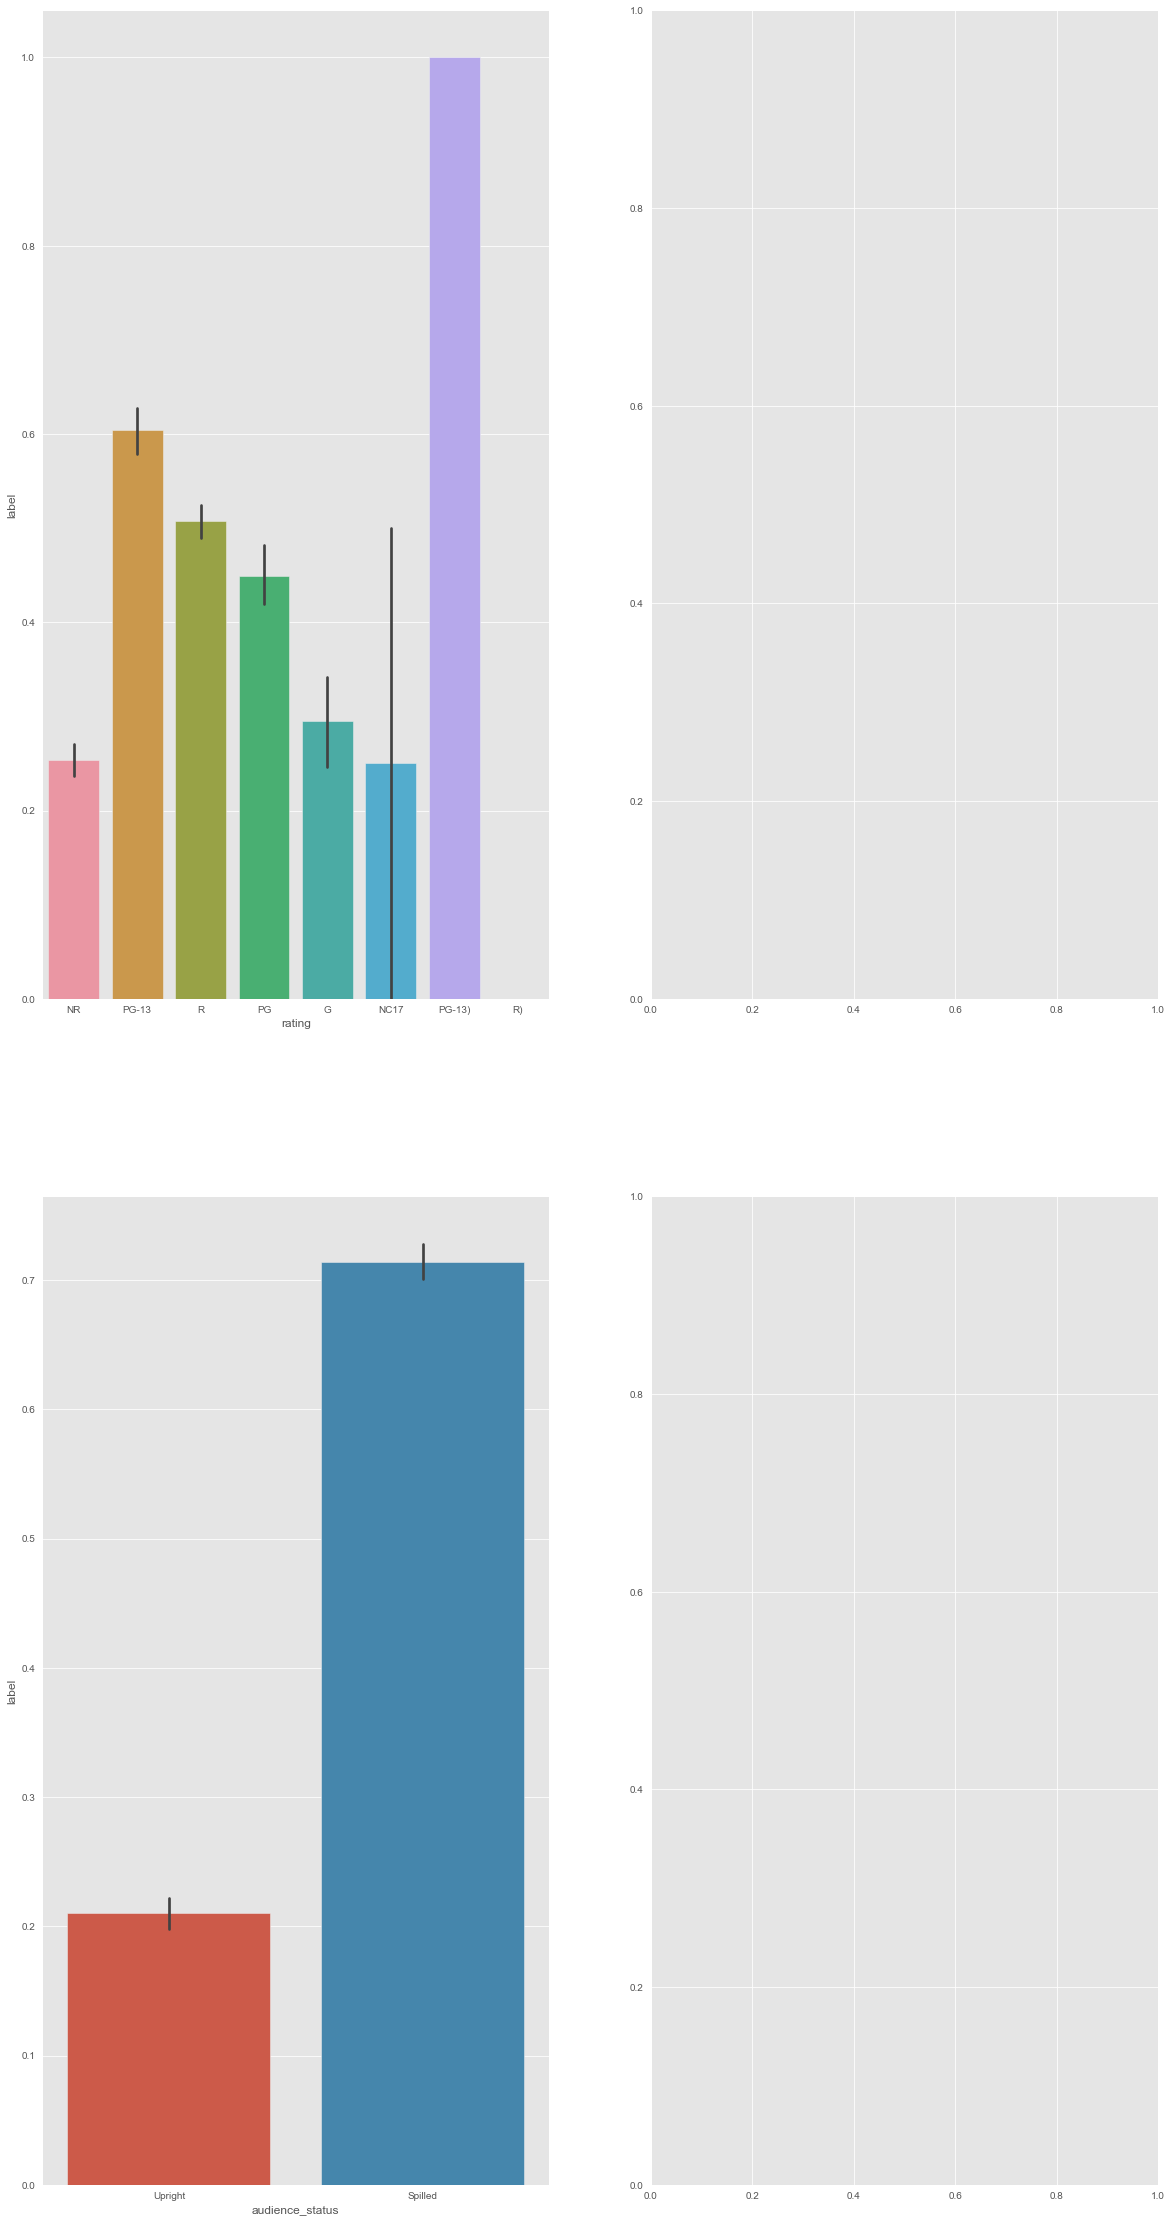

In [43]:
fig, axes = plt.subplots(figsize=(20,40), nrows=round(len(n_cat_cols)/2)+1,ncols=2)
i=0
j=0
for item in n_cat_cols:
    if item == 'label':
        continue
    sns.barplot(x=data[item],y=data['label'],ax=axes[i,j])
    if i==round(len(n_cat_cols)/2):
        i=0
        j=1
    else:
        i=i+1

In [46]:
def missing(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
    temp=pd.concat([total,percent],axis=1,keys=["total","percent"])
    return temp[temp["total"]> 0]
print(missing(data[impvars]))
print(missing(data[n_cat_cols]))

                 total   percent
audience_rating    127  0.014596
                 total   percent
audience_status    127  0.014596


In [48]:
n_impvars=list(set(impvars)-set(['tomatometer_rating']))

data=data.dropna()
print(missing(data[n_impvars]))
print(missing(data[n_cat_cols]))

Empty DataFrame
Columns: [total, percent]
Index: []
Empty DataFrame
Columns: [total, percent]
Index: []


In [49]:
data.loc[(data['rating']=='PG-13)'),'rating']='PG-13'

for item in n_impvars:
    data['ln'+str(item)]=np.log(data[item]+1)
    
for item in n_cat_cols:
    dummies=pd.get_dummies(data[item],prefix=item)
    data=pd.concat([data,dummies],axis=1)


In [52]:
data.columns

features=list(set(data.columns)-set(num_cols)-set(cat_cols)-set(['label']))
print(features)




['rating_G', 'rating_R', 'lnaudience_rotten_critics_count', 'lnaudience_fresh_critics_count', 'lnaudience_rating', 'lnlabel', 'audience_status_Spilled', 'rating_PG-13', 'rating_NC17', 'rating_NR', 'rating_PG', 'audience_status_Upright', 'rating_R)']


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(data[features],data['label'],test_size=0.3,random_state=123)


print(X_train.shape)
print(X_test.shape)
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

(2816, 13)
(1208, 13)
0.41654829545454547
0.44370860927152317


In [54]:
train_actuals=np.array(y_train).flatten()
test_actuals=np.array(y_test).flatten()

In [55]:
m1=LogisticRegression(penalty='l2')
m1.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
train_forecast=m1.predict(X_train).flatten()
test_forecast=m1.predict(X_test).flatten()


In [61]:
print('Train accuracy score: %f' % accuracy_score(train_actuals,train_forecast))
print('Train auc score: %f' % f1_score(train_actuals,train_forecast))
print(classification_report(train_actuals,train_forecast))

Train accuracy score: 1.000000
Train auc score: 1.000000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1643
           1       1.00      1.00      1.00      1173

    accuracy                           1.00      2816
   macro avg       1.00      1.00      1.00      2816
weighted avg       1.00      1.00      1.00      2816



In [64]:
m1.coef_

array([[-6.35712466e-03,  6.69391963e-03,  3.36757805e+00,
        -3.33151618e+00, -4.48442714e-01,  7.84266583e+00,
         1.04038355e-01,  1.43401188e-01,  2.41050122e-02,
        -1.69913523e-01,  1.23730289e-02, -1.05484786e-01,
        -1.17489313e-02]])